## Packages and Datasets Setup

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox, yeojohnson
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
df = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')

## Data Inspection

In [30]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [31]:
df['AdvertisingTool'].unique

<bound method Series.unique of 0       ToolConfid
1       ToolConfid
2       ToolConfid
3       ToolConfid
4       ToolConfid
           ...    
7995    ToolConfid
7996    ToolConfid
7997    ToolConfid
7998    ToolConfid
7999    ToolConfid
Name: AdvertisingTool, Length: 8000, dtype: object>

In [32]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8000 rows and 20 columns


In [33]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = missing_percentage[missing_percentage > 0]
print(missing_data)

Series([], dtype: float64)


In [34]:
missing_percentage

CustomerID             0.0
Age                    0.0
Gender                 0.0
Income                 0.0
CampaignChannel        0.0
CampaignType           0.0
AdSpend                0.0
ClickThroughRate       0.0
ConversionRate         0.0
WebsiteVisits          0.0
PagesPerVisit          0.0
TimeOnSite             0.0
SocialShares           0.0
EmailOpens             0.0
EmailClicks            0.0
PreviousPurchases      0.0
LoyaltyPoints          0.0
AdvertisingPlatform    0.0
AdvertisingTool        0.0
Conversion             0.0
dtype: float64

## Feature Encoding

In [35]:
df=df.drop(columns=["CustomerID","AdvertisingTool","AdvertisingPlatform"])

In [36]:
print(df.dtypes)

Age                    int64
Gender                object
Income                 int64
CampaignChannel       object
CampaignType          object
AdSpend              float64
ClickThroughRate     float64
ConversionRate       float64
WebsiteVisits          int64
PagesPerVisit        float64
TimeOnSite           float64
SocialShares           int64
EmailOpens             int64
EmailClicks            int64
PreviousPurchases      int64
LoyaltyPoints          int64
Conversion             int64
dtype: object


In [37]:

for column in df.select_dtypes(include=['object']).columns:
    # Get the number of unique values and the unique values themselves
    num_unique = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}")
    print('-' * 40)  # Separator line for clarity


Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']
----------------------------------------
Column: CampaignChannel
Number of unique values: 5
Unique values: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
----------------------------------------
Column: CampaignType
Number of unique values: 4
Unique values: ['Awareness' 'Retention' 'Conversion' 'Consideration']
----------------------------------------


In [38]:
 # Define the columns that need to be one-hot encoded
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']

# Use pandas get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)



## Covariance Check

                                      Age        Income       AdSpend  \
Age                            222.093011  4.889813e+03 -1.948577e+02   
Income                        4889.812909  1.412286e+09  3.911963e+05   
AdSpend                       -194.857744  3.911963e+05  8.054461e+06   
ClickThroughRate                 0.014449  2.550885e+01 -1.977834e+00   
ConversionRate                   0.016379  3.619798e+01 -3.143724e+00   
WebsiteVisits                   -0.443322 -1.572267e+03  2.951058e+02   
PagesPerVisit                   -0.360593  3.790537e+02 -6.849281e+01   
TimeOnSite                      -0.819063  3.083320e+03 -5.202484e+01   
SocialShares                    -4.104882 -6.839048e+03 -1.727194e+03   
EmailOpens                       1.281375 -3.231855e+02  2.676716e+02   
EmailClicks                      0.375454  9.168446e+02  8.278537e+00   
PreviousPurchases               -0.306594 -1.294146e+03  1.949175e+01   
LoyaltyPoints                  299.309092 -3.857795

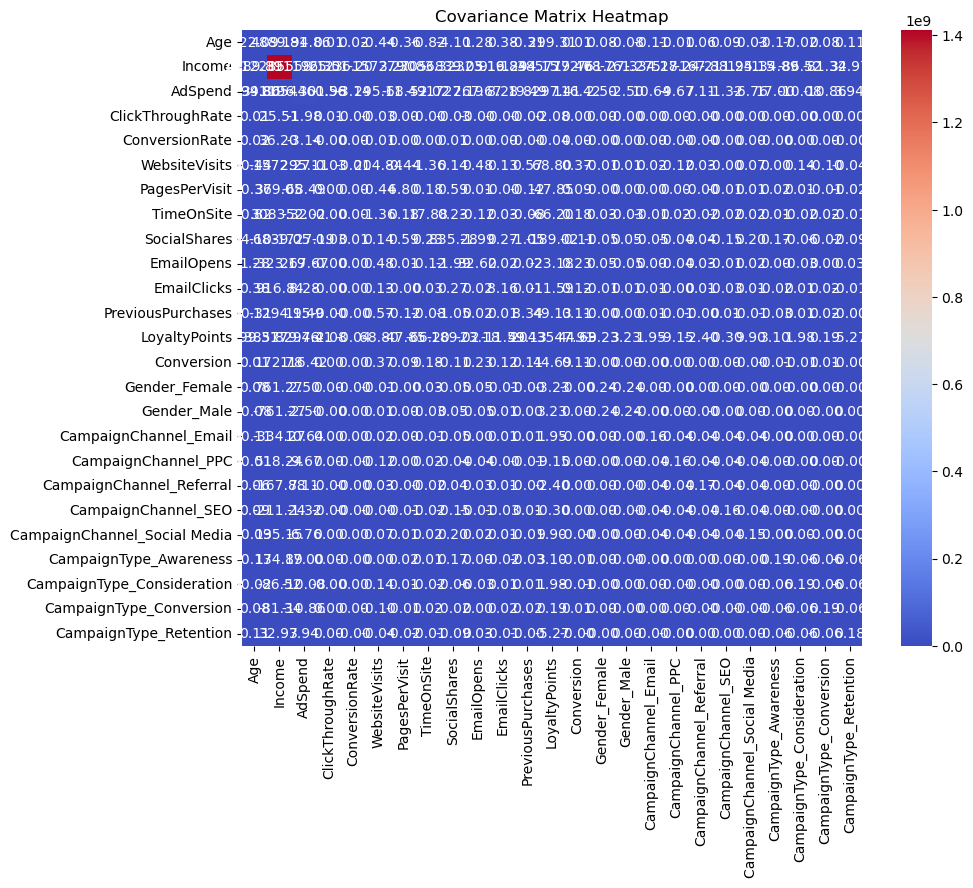

In [39]:
# Compute the covariance matrix for numerical columns
cov_matrix = df.cov()

# Display the covariance matrix
print(cov_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()


## Trial of K means

In [40]:
range_n_clusters = range(2, 20)
silhouette_scores = {}
inertia_values = {}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    sil_score = silhouette_score(df, labels)
    inertia = kmeans.inertia_
    
    silhouette_scores[n_clusters] = sil_score
    inertia_values[n_clusters] = inertia
    
    print(f"Clusters: {n_clusters}, Silhouette Score: {sil_score:.4f}, Inertia: {inertia:.4f}")

Clusters: 2, Silhouette Score: 0.6179, Inertia: 2874261886170.6006
Clusters: 3, Silhouette Score: 0.5644, Inertia: 1340277001309.0002
Clusters: 4, Silhouette Score: 0.5423, Inertia: 766548201900.4075
Clusters: 5, Silhouette Score: 0.5139, Inertia: 524604585973.3807
Clusters: 6, Silhouette Score: 0.4881, Inertia: 390982982047.3969
Clusters: 7, Silhouette Score: 0.4704, Inertia: 306488960490.1136
Clusters: 8, Silhouette Score: 0.4483, Inertia: 258514225612.0709
Clusters: 9, Silhouette Score: 0.4262, Inertia: 220004046215.2219
Clusters: 10, Silhouette Score: 0.4125, Inertia: 192318256686.8859
Clusters: 11, Silhouette Score: 0.3971, Inertia: 172899570983.6617
Clusters: 12, Silhouette Score: 0.3802, Inertia: 157682192155.8801
Clusters: 13, Silhouette Score: 0.3669, Inertia: 146101511807.6613
Clusters: 14, Silhouette Score: 0.3542, Inertia: 136523783668.5473
Clusters: 15, Silhouette Score: 0.3388, Inertia: 129940227251.7422
Clusters: 16, Silhouette Score: 0.3243, Inertia: 123911963160.2436
C